<a href="https://colab.research.google.com/github/andreidm92/computer_vision_tasks/blob/main/practice/Lesson_12_annotation_jacobian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Урок 12: Разметка кастомного датасета + Матрицы Якоби + OpenCV трансформации

## 📌 Часть 1: Разметка кастомного датасета (YOLO формат)

### 🔹 Что нужно сделать:
1. Найдите или сделайте 10 изображений с 2–3 типами объектов.
2. Установите `labelImg`:
```bash
pip install labelImg
labelImg
```
3. Разметьте объекты — сохраните в YOLO формате (будут .txt файлы).
4. Пример содержимого .txt файла:
```
0 0.523 0.489 0.122 0.201
1 0.770 0.600 0.150 0.220
```
- Где: `class_id x_center y_center width height` (всё нормализовано).


In [ ]:
!pip install labelImg
import labelImg
labelImg


<module 'labelImg' from '/usr/local/lib/python3.11/dist-packages/labelImg/__init__.py'>

In [ ]:
labelImg

<module 'labelImg' from '/usr/local/lib/python3.11/dist-packages/labelImg/__init__.py'>

Создал txt формат
Класс      x,       y,       w,       h
  0     0.243750 0.716471 0.462500 0.407059
  1     0.745313 0.476471 0.462500 0.614118
  2     0.500781 0.509412 0.992188 0.981176

  0 - dog
  1 - cat
  2 - man
  3 - woman

## 🧪 Часть 2: OpenCV: визуализация и трансформация bbox на изображениях


In [ ]:
## 🟢 OpenCV: визуализация и трансформация bbox на изображениях

В этом задании мы научимся работать с bounding boxes в формате YOLO:

1. Преобразуем нормализованные координаты (YOLO-формат) в абсолютные (пиксели)
2. Отобразим рамки с помощью `cv2.rectangle`
3. Добавим подписи классов с `cv2.putText`
4. Реализуем обратное преобразование: абсолютные координаты → YOLO-формат
5. Проверим точность восстановления координат

---

### 🔁 YOLO → абсолютные координаты:

YOLO bbox задаётся как:
<class_id> <x_center> <y_center> <width> <height>



Где:
- Все значения в диапазоне [0, 1]
- $x_{center}, y_{center}$ — центр bbox
- $width, height$ — ширина и высота bbox

---

### 🔁 Преобразование из YOLO в абсолютные координаты

Если размеры изображения $W \times H$, то координаты в пикселях вычисляются так:

$$
\begin{aligned}
x_{center} &= x_{norm} \cdot W \\
y_{center} &= y_{norm} \cdot H \\
w &= width_{norm} \cdot W \\
h &= height_{norm} \cdot H \\
\\
x_{min} &= x_{center} - \frac{w}{2} \\
y_{min} &= y_{center} - \frac{h}{2} \\
x_{max} &= x_{center} + \frac{w}{2} \\
y_{max} &= y_{center} + \frac{h}{2}
\end{aligned}
$$

---

### 🔁 Обратное преобразование: абсолютные координаты → YOLO

$$
\begin{aligned}
x_{center\_norm} &= \frac{x_{min} + x_{max}}{2W} \\
y_{center\_norm} &= \frac{y_{min} + y_{max}}{2H} \\
width_{norm} &= \frac{x_{max} - x_{min}}{W} \\
height_{norm} &= \frac{y_{max} - y_{min}}{H}
\end{aligned}
$$

---

### ✅ Задание

- [ ] Подставь своё изображение и YOLO-аннотацию
- [ ] Отобрази bbox средствами OpenCV
- [ ] Проверь точность восстановления
- [ ] Ответь: **зачем нормализуются координаты в YOLO?**


Размер изображения: 640x425


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


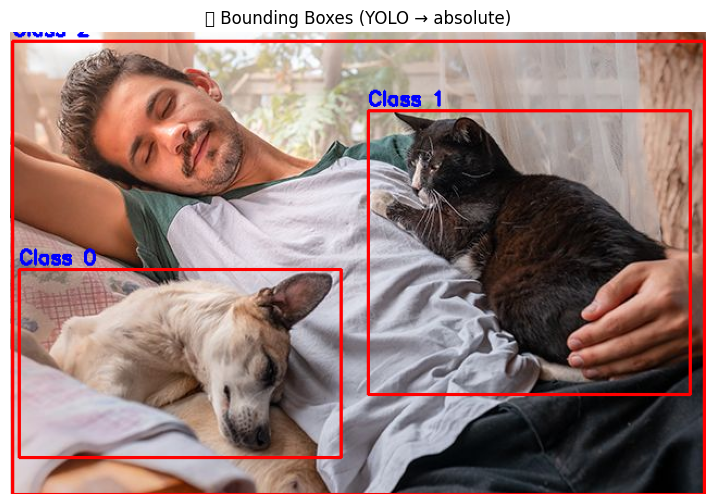

In [1]:
import cv2
import matplotlib.pyplot as plt

# Путь к изображению
img_path = '/content/foto1.jpg'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
H, W, _ = image.shape
print(f"Размер изображения: {W}x{H}")

# Пример аннотаций в формате YOLO
yolo_labels = [
    [0, 0.243750, 0.716471, 0.462500, 0.407059],
    [1, 0.745313, 0.476471, 0.462500, 0.614118],
    [2, 0.500781, 0.509412, 0.992188, 0.981176]
]

# Функция: YOLO -> абсолютные координаты bbox
def yolo_to_bbox(yolo_box, img_width, img_height):
    cls, x_c, y_c, w, h = yolo_box
    x_c *= img_width
    y_c *= img_height
    w *= img_width
    h *= img_height
    x1 = int(x_c - w / 2)
    y1 = int(y_c - h / 2)
    x2 = int(x_c + w / 2)
    y2 = int(y_c + h / 2)
    return int(cls), x1, y1, x2, y2

# Отображение bbox
image_bbox = image.copy()
for label in yolo_labels:
    cls, x1, y1, x2, y2 = yolo_to_bbox(label, W, H)
    cv2.rectangle(image_bbox, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(image_bbox, f"Class {cls}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

plt.figure(figsize=(10, 6))
plt.imshow(image_bbox)
plt.title("🖼️ Bounding Boxes (YOLO → absolute)")
plt.axis(False)
plt.show()


## 📐 Часть 3: Матрица Якоби — теория и примеры

### 🔸 Формальное определение:
Пусть:
$$
\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^m
$$

Матрица Якоби:
$$
J = \left[\frac{\partial f_i}{\partial x_j}\right]_{m \times n}
$$

### 🔸 Пример:
Для функции:
$$
f(x, y, z) =
\begin{bmatrix}
xz + y \\
z^2 + \sin(x)
\end{bmatrix}
$$

Якоби:
$$
J =
\begin{bmatrix}
z & 1 & x \\
\cos(x) & 0 & 2z
\end{bmatrix}
$$


🧠 Интуиция
Матрица Якоби описывает, как маленькое изменение входа влияет на выход функции. Она как "градиент" для векторной функции.

🧩 В компьютерном зрении Якоби используется:
Применение	Объяснение
📍 Трекинг (оптический поток)	Метод Лукаса-Канаде строит линейную систему с помощью Якоби
📏 Глубина и параллакс	Якоби отражает, как изменение положения камеры влияет на изображение
🎓 Backpropagation в CNN и ViT	Все градиенты — это частные производные, т.е. якобианы
🤖 Кинематика роботов	Якоби связывает скорость суставов с перемещением конечностей
🔧 SLAM / Visual Odometry	Якоби участвует в оптимизации через градиентный спуск


📌 Почему это важно?
В компьютерном зрении часто нужны локальные линейные приближения:

движение объекта по кадру

деформация изображения

изменение позиции камеры

Якоби — это линейное приближение многомерной функции, которое позволяет локально описывать поведение изображения, движения или модели.

## ✍️ Упражнение: Найдите Якоби для функции

$$
f(x, y) = \begin{bmatrix}
x \cdot e^y \\
\ln(x^2 + 1)
\end{bmatrix}
$$

Посчитайте вручную и запишите сюда:


$$
f(x, y) =
\begin{bmatrix}
e^y & x \cdot e^y \\
\frac{2x}{x^2 + 1} & 0
\end{bmatrix}
$$

### 🧠 Интерпретация:
- Эта матрица описывает, как изменение $x$ и $y$ влияет на значения функции $f(x, y)$
- Используется в:
  - Оптическом потоке (Lucas-Kanade)
  - Трекинге
  - Обратном распространении ошибки в нейросетях
  - Визуальной одометрии и SLAM


In [4]:
# ПРИМЕР

# Повторная инициализация — f должен быть вектор-столбцом
from sympy import symbols, Matrix, exp, simplify
from pathlib import Path

# Объявляем переменные
x, y = symbols('x y')

# Функция f(x, y) как вектор-столбец (векторное отображение R^2 -> R^2)
f = Matrix([
    exp(y),
    x * exp(y),
    2 * x / (x**2 + 1),
    0
])

# Только первые два элемента нужны (R^2 -> R^2)
f_vector = Matrix([
    exp(y),
    2 * x / (x**2 + 1)
])

# Вычисляем Якобиан
J = f_vector.jacobian([x, y])
J_simplified = simplify(J)

print(J_simplified)

Matrix([[0, exp(y)], [2*(1 - x**2)/(x**4 + 2*x**2 + 1), 0]])


# Формируем Markdown-блок
colab_markdown = f"""
## 📐 Пример: Якоби и анализ движения

Рассмотрим вектор-функцию:
$$
f(x, y) =
\\begin{{bmatrix}}
e^y \\\\
\\frac{{2x}}{{x^2 + 1}}
\\end{{bmatrix}}
$$

### 🔧 Матрица Якоби:
$$
J_f(x, y) =
{J_simplified}
$$

### 🧠 Интерпретация:
- Эта матрица описывает, как изменение $x$ и $y$ влияет на значения функции $f(x, y)$
- Используется в:
  - Оптическом потоке (Lucas-Kanade)
  - Трекинге
  - Обратном распространении ошибки в нейросетях
  - Визуальной одометрии и SLAM

"""

✅ Вывод:
Матрица Якоби позволила предсказать, как изменится функция при малом движении. Это:

работает как линейное приближение

используется в методах трекинга, оптимизации, обучения нейросетей

особенно полезно в визуальной одометрии и SLAM, когда нельзя пересчитать всю функцию

